# Input score table: linking fragments and inputs

**Set environment**

In [1]:
import sys
sys.path.append('../')
from config_sing import *

You are on Duke Server: Singularity: Proj CombEffect
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect


In [2]:
import sqlite3
import itertools as it

## Test: check where the data is

In [3]:
fdiry = os.path.join(FD_RES, "coverage")
os.listdir(fdiry)

['TFX_DMSO',
 'Input5_20x',
 'Input1_20x',
 'TFX2_DMSO',
 'TFX_Dex',
 'Input3',
 'TFX5_Dex',
 'Input4_20x',
 'TFX2_Dex',
 'TFX5_DMSO',
 'TFX4_Dex',
 'Input4',
 'Input5',
 'target_PER1',
 'Input1',
 'Input2',
 'Input',
 'TFX3_Dex',
 'TFX4_DMSO',
 'Input2_20x',
 'TFX3_DMSO',
 'Input3_20x']

In [4]:
fdiry = os.path.join(FD_RES, "coverage", "Input1_20x")
os.listdir(fdiry)

['chr16.bedgraph',
 'chrY.bedgraph',
 'chr4.bedgraph',
 'chr11.bedgraph',
 'chr3.bedgraph',
 'chr21.bedgraph',
 'chr14.bedgraph',
 'Input1_20x.bw',
 'chr15.bedgraph',
 'chr2.bedgraph',
 'chr17_perbase.tsv.gz',
 'chrX.bedgraph',
 'chr9.bedgraph',
 'chr17.bedgraph',
 'Input1_20x.bedgraph',
 'chr18.bedgraph',
 'chr19.bedgraph',
 'chr6.bedgraph',
 'chr12.bedgraph',
 'chr20.bedgraph',
 'chr7.bedgraph',
 'chr22.bedgraph',
 'chr10.bedgraph',
 'chr8.bedgraph',
 'chr13.bedgraph',
 'chr5.bedgraph',
 'chr1.bedgraph']

In [5]:
fglob = os.path.join(FD_RES, "coverage", "*", "chr17_perbase.tsv.gz")
glob.glob(fglob)

['/mount/work/out/proj_combeffect/coverage/Input5_20x/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input1_20x/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/TFX2_DMSO/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input3/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/TFX5_Dex/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input4_20x/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/TFX2_Dex/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/TFX5_DMSO/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/TFX4_Dex/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input4/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input5/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input1/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_combeffect/coverage/Input2/chr17_perbase.tsv.gz',
 '/mount/work/out/proj_comb

In [6]:
%%bash
FPATH="/mount/work/out/proj_combeffect/coverage/Input1/chr17_perbase.tsv.gz"
zcat ${FPATH} | head

chr17	1	0
chr17	2	0
chr17	3	0
chr17	4	0
chr17	5	0
chr17	6	0
chr17	7	0
chr17	8	0
chr17	9	0
chr17	10	0


## Test: read in the data

In [8]:
###
fdirys = list()

###
samples = "Input?,Input?_20x,TFX?_DMSO,TFX?_Dex".split(",")
for sam in samples:
    fglob = os.path.join(FD_RES, "coverage", sam)
    lst   = glob.glob(fglob)
    lst.sort()
    fdirys += lst
    
###
for fdiry in fdirys:
    print(fdiry)

/mount/work/out/proj_combeffect/coverage/Input1
/mount/work/out/proj_combeffect/coverage/Input2
/mount/work/out/proj_combeffect/coverage/Input3
/mount/work/out/proj_combeffect/coverage/Input4
/mount/work/out/proj_combeffect/coverage/Input5
/mount/work/out/proj_combeffect/coverage/Input1_20x
/mount/work/out/proj_combeffect/coverage/Input2_20x
/mount/work/out/proj_combeffect/coverage/Input3_20x
/mount/work/out/proj_combeffect/coverage/Input4_20x
/mount/work/out/proj_combeffect/coverage/Input5_20x
/mount/work/out/proj_combeffect/coverage/TFX2_DMSO
/mount/work/out/proj_combeffect/coverage/TFX3_DMSO
/mount/work/out/proj_combeffect/coverage/TFX4_DMSO
/mount/work/out/proj_combeffect/coverage/TFX5_DMSO
/mount/work/out/proj_combeffect/coverage/TFX2_Dex
/mount/work/out/proj_combeffect/coverage/TFX3_Dex
/mount/work/out/proj_combeffect/coverage/TFX4_Dex
/mount/work/out/proj_combeffect/coverage/TFX5_Dex


In [9]:
fdiry = fdirys[0]
fname = "chr17_perbase.tsv.gz"
fpath = os.path.join(fdiry, fname)
print(fpath)

n_lines = 5
with gzip.open(fpath, "rb") as file:
    lines  = it.islice(file, n_lines)
    for line in lines:
        lst = line.decode('ASCII').strip().split('\t')  
        print(lst)

/mount/work/out/proj_combeffect/coverage/Input1/chr17_perbase.tsv.gz
['chr17', '1', '0']
['chr17', '2', '0']
['chr17', '3', '0']
['chr17', '4', '0']
['chr17', '5', '0']


## Test: Generate table
- Coverage
    - chrom
    - location
    - depth
    - sample

In [13]:
query_reset = ("DROP TABLE IF EXISTS Coverage")

query_table = ("""CREATE TABLE IF NOT EXISTS Coverage(
    chrom    TEXT,
    location INTEGER,
    depth    INTEGER,
    sample   TEXT,
    FOREIGN KEY (sample) REFERENCES Sample (sample)
);""")

query_insert = ("""INSERT OR IGNORE INTO Coverage
    (chrom, location, depth, sample)
    VALUES 
    (?,?,?,?)""")

In [15]:
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

fdiry = fdirys[0]
fname = "chr17_perbase.tsv.gz"
fpath_gz = os.path.join(fdiry, fname)
sam   = os.path.basename(fdiry)

with sqlite3.connect(fpath_db) as conn, gzip.open(fpath_gz, "rb") as file:
    ### reset
    cursor = conn.cursor()
    query  = query_reset
    cursor.execute(query)
    
    ### create table
    cursor = conn.cursor()
    query  = query_table
    cursor.execute(query)
    
    ### insert values
    query  = query_insert
    
    n_lines = 5
    with gzip.open(fpath, "rb") as file:
        lines  = it.islice(file, n_lines)
        for line in lines:
            row = line.decode('ASCII').strip().split('\t')
            row.append(sam)
            cursor.execute(query, row)
            
    ### show that the table is created
    cursor.execute("SELECT * FROM Coverage")
    for row in cursor.fetchall():
        print(row)

('chr17', 1, 0, 'Input1')
('chr17', 2, 0, 'Input1')
('chr17', 3, 0, 'Input1')
('chr17', 4, 0, 'Input1')
('chr17', 5, 0, 'Input1')


## Insert the whole tables

In [17]:
query_reset = ("DROP TABLE IF EXISTS Coverage")

query_table = ("""CREATE TABLE IF NOT EXISTS Coverage(
    chrom    TEXT,
    location INTEGER,
    depth    INTEGER,
    sample   TEXT,
    FOREIGN KEY (sample) REFERENCES Sample (sample)
);""")

query_insert = ("""INSERT OR IGNORE INTO Coverage
    (chrom, location, depth, sample)
    VALUES 
    (?,?,?,?)""")

In [18]:
###
fdirys = list()

###
samples = "Input?,Input?_20x,TFX?_DMSO,TFX?_Dex".split(",")
for sam in samples:
    fglob = os.path.join(FD_RES, "coverage", sam)
    lst   = glob.glob(fglob)
    lst.sort()
    fdirys += lst
    
###
for fdiry in fdirys:
    print(fdiry)

/mount/work/out/proj_combeffect/coverage/Input1
/mount/work/out/proj_combeffect/coverage/Input2
/mount/work/out/proj_combeffect/coverage/Input3
/mount/work/out/proj_combeffect/coverage/Input4
/mount/work/out/proj_combeffect/coverage/Input5
/mount/work/out/proj_combeffect/coverage/Input1_20x
/mount/work/out/proj_combeffect/coverage/Input2_20x
/mount/work/out/proj_combeffect/coverage/Input3_20x
/mount/work/out/proj_combeffect/coverage/Input4_20x
/mount/work/out/proj_combeffect/coverage/Input5_20x
/mount/work/out/proj_combeffect/coverage/TFX2_DMSO
/mount/work/out/proj_combeffect/coverage/TFX3_DMSO
/mount/work/out/proj_combeffect/coverage/TFX4_DMSO
/mount/work/out/proj_combeffect/coverage/TFX5_DMSO
/mount/work/out/proj_combeffect/coverage/TFX2_Dex
/mount/work/out/proj_combeffect/coverage/TFX3_Dex
/mount/work/out/proj_combeffect/coverage/TFX4_Dex
/mount/work/out/proj_combeffect/coverage/TFX5_Dex


In [19]:
%%time

fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

counter_tot = 0
with sqlite3.connect(fpath_db) as conn:
    ### reset
    cursor = conn.cursor()
    query  = query_reset
    cursor.execute(query)
    
    ### 
    for fdiry in fdirys:
        ### init, show progress
        fname = "chr17_perbase.tsv.gz"
        fpath_gz = os.path.join(fdiry, fname)
        sam   = os.path.basename(fdiry)
        
        ###
        print(fpath_gz, flush=True)
        counter = 0
        
        with gzip.open(fpath_gz, "rb") as file:
            ### create table if not exist
            cursor = conn.cursor()
            query  = query_table
            cursor.execute(query)

            ### insert values
            query  = query_insert
            lines  = file #it.islice(file, n_lines)
            for line in lines:
                row = line.decode('ASCII').strip().split('\t')
                row.append(sam)
                cursor.execute(query, row)
                counter_tot += 1
                counter     += 1
                
        print("#Rows Inserted:", counter, flush=True)
        
print()            
print("#Rows Total:", counter_tot)

/mount/work/out/proj_combeffect/coverage/Input1/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input2/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input3/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input4/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input5/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input1_20x/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input2_20x/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input3_20x/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input4_20x/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage/Input5_20x/chr17_perbase.tsv.gz
#Rows Inserted: 83257441
/mount/work/out/proj_combeffect/coverage

**Indexing the location**

In [27]:
query_index = """CREATE INDEX idx_location ON Coverage (location)"""

In [28]:
%%time
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    ### query
    cursor = conn.cursor()
    query  = query_index
    cursor.execute(query)

CPU times: user 15min 18s, sys: 2min 39s, total: 17min 58s
Wall time: 18min 12s


## Test plot

In [29]:
query_out = """SELECT c.chrom, c.location, c.depth FROM Coverage c
WHERE c.sample = 'Input1_20x' AND c.location BETWEEN 8148000 AND 8160000
"""

In [30]:
%%time
fdiry = os.path.join(FD_RES, 'database')
fname = "fragment.db"
fpath_db = os.path.join(fdiry, fname)

with sqlite3.connect(fpath_db) as conn:
    ### query
    cursor = conn.cursor()
    query  = query_out
    cursor.execute(query)
    
    ### 
    rows = cursor.fetchall()

CPU times: user 167 ms, sys: 21.8 ms, total: 189 ms
Wall time: 2.01 s


In [31]:
len(rows)

12001

In [32]:
rows[:5]

[('chr17', 8148000, 501),
 ('chr17', 8148001, 501),
 ('chr17', 8148002, 500),
 ('chr17', 8148003, 492),
 ('chr17', 8148004, 495)]

In [33]:
import pandas as pd

In [34]:
dat = pd.DataFrame(rows, columns=["Chrom", "Loc", "Depth"])
dat.head()

,Chrom,Loc,Depth
0,chr17,8148000,501
1,chr17,8148001,501
2,chr17,8148002,500
3,chr17,8148003,492
4,chr17,8148004,495


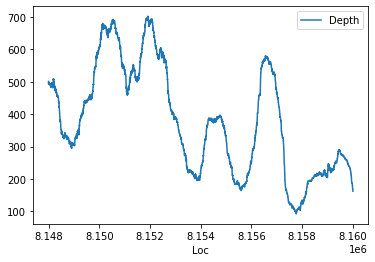

In [35]:
dat.plot(x="Loc", y="Depth")